In [1]:
# Importar las librerías necesarias
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objects as go
import plotly.express as px

In [5]:
# Inicializacion de Variables. Listas para almacenar los diccionarios y los números de línea con errores
datos = []
lineas_con_errores = []

# Contadores para el total de líneas y registros leídos correctamente
total_lineas = 0
registros_correctos = 0

# Lectura del primer archivo comprimido . Abrir el archivo y leerlo línea por línea. 
with open('df_final_utah.json', 'rt', encoding='utf-8') as archivo:

    for num_linea, linea in enumerate(archivo, start=1):  # Bucle for para recorrer cada línea del archivo.
        total_lineas += 1
        try:
            # Intentar cargar la línea como JSON
            data = json.loads(linea)
            datos.append(data)
            registros_correctos += 1
        except json.JSONDecodeError:
            try:
                # Si falla como JSON, intentar cargarlo como diccionario
                data = eval(linea)  # Usa eval para interpretar la línea como un diccionario
                if isinstance(data, dict):
                    datos.append(data)
                    registros_correctos += 1
                else:
                    lineas_con_errores.append(num_linea)
            except Exception as e:
                lineas_con_errores.append(num_linea)

# Crear un DataFrame a partir de la lista de diccionarios
df = pd.DataFrame(datos)

In [6]:
df.shape

(275001, 15)

In [4]:
df.shape

(30834, 40)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30834 entries, 0 to 30833
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            30834 non-null  object 
 1   name_x             30834 non-null  object 
 2   time               30834 non-null  int64  
 3   rating             30834 non-null  int64  
 4   text               30834 non-null  object 
 5   pics               30834 non-null  object 
 6   resp               30834 non-null  object 
 7   gmap_id            30834 non-null  object 
 8   name_y             30834 non-null  object 
 9   address            30834 non-null  object 
 10  description        30834 non-null  object 
 11  latitude           30834 non-null  float64
 12  longitude          30834 non-null  float64
 13  category           30834 non-null  object 
 14  avg_rating         30834 non-null  float64
 15  num_of_reviews     30834 non-null  int64  
 16  price              308

In [7]:
total_nulls = df.isnull().sum()
print(total_nulls)


user_id                  0
name_x                   0
time                     0
rating                   0
text                     0
pics                     0
resp                     0
gmap_id                  0
name_y                   0
address                  0
description              0
latitude                 0
longitude                0
category                 0
avg_rating               0
num_of_reviews           0
price                    0
hours                    0
state                    0
relative_results         0
url                      0
Service options          0
Health & safety          0
Accessibility            0
Planning                 0
Payments                 0
Highlights               0
Popular for              0
Offerings                0
Dining options           0
Amenities                0
Atmosphere               0
Crowd                    0
Health and safety    20235
From the business        0
Recycling                0
Getting here             0
A

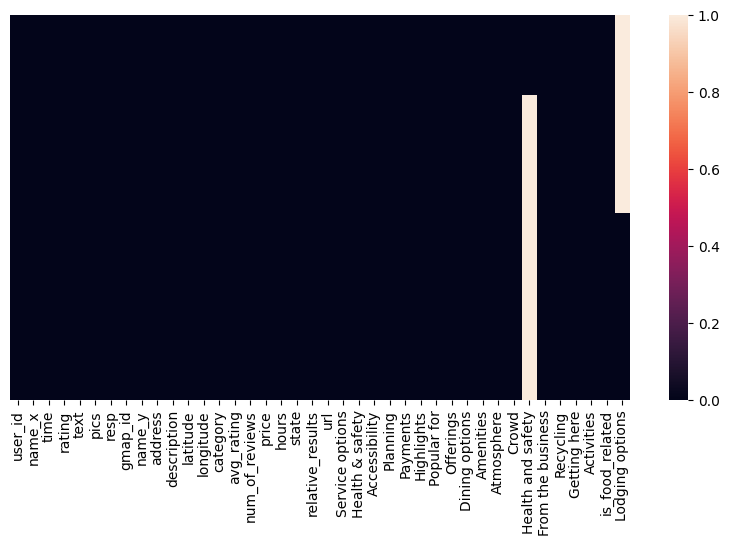

In [6]:

# plot the null values
plt.figure(figsize=(10,5), dpi=100)
sns.heatmap(data=df.isnull(), yticklabels=False)

plt.show()

In [8]:
df = df.fillna('sin dato')


In [9]:
# Algun duplicado, los eliminaremos.
df = df.loc[:,~df.columns.duplicated()].copy()

display(df.head())

# Print the info
display(df.info())

,user_id,name_x,time,rating,text,pics,resp,gmap_id,name_y,address,...,Amenities,Atmosphere,Crowd,Health and safety,From the business,Recycling,Getting here,Activities,is_food_related,Lodging options
0,100609882855642277344,Eric Ruiz,1615583899364,5,,,,0x87528c956cf088cf:0xa9bd9bb45594f74b,McDonald's,"McDonald's, 3464 W 3500 S, West Valley City, U...",...,"[Gender-neutral toilets, Good for kids, Toilets]",[Casual],[Groups],,,,,,True,sin dato
1,100856373937380351110,Carlos Gallardo,1554713215026,2,,,,0x87528c956cf088cf:0xa9bd9bb45594f74b,McDonald's,"McDonald's, 3464 W 3500 S, West Valley City, U...",...,"[Gender-neutral toilets, Good for kids, Toilets]",[Casual],[Groups],,,,,,True,sin dato
2,111220286459924328350,Michael Long,1507152434474,3,,,,0x87528c956cf088cf:0xa9bd9bb45594f74b,McDonald's,"McDonald's, 3464 W 3500 S, West Valley City, U...",...,"[Gender-neutral toilets, Good for kids, Toilets]",[Casual],[Groups],,,,,,True,sin dato
3,107915300161744189586,Shambray Perkins,1567474887327,1,,,,0x87528c956cf088cf:0xa9bd9bb45594f74b,McDonald's,"McDonald's, 3464 W 3500 S, West Valley City, U...",...,"[Gender-neutral toilets, Good for kids, Toilets]",[Casual],[Groups],,,,,,True,sin dato
4,106062829954412827416,Danilo Noriega,1614551182378,5,,,,0x87528c956cf088cf:0xa9bd9bb45594f74b,McDonald's,"McDonald's, 3464 W 3500 S, West Valley City, U...",...,"[Gender-neutral toilets, Good for kids, Toilets]",[Casual],[Groups],,,,,,True,sin dato


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25524 entries, 0 to 25523
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            25524 non-null  object 
 1   name_x             25524 non-null  object 
 2   time               25524 non-null  int64  
 3   rating             25524 non-null  int64  
 4   text               25524 non-null  object 
 5   pics               25524 non-null  object 
 6   resp               25524 non-null  object 
 7   gmap_id            25524 non-null  object 
 8   name_y             25524 non-null  object 
 9   address            25524 non-null  object 
 10  description        25524 non-null  object 
 11  latitude           25524 non-null  float64
 12  longitude          25524 non-null  float64
 13  category           25524 non-null  object 
 14  avg_rating         25524 non-null  float64
 15  num_of_reviews     25524 non-null  int64  
 16  price              255

None

In [10]:


# Agrupar por name_y y calcular la media de avg_rating
df_grouped = df.groupby("name_y")["avg_rating"].mean()

# Ordenar los resultados de mayor a menor y seleccionar los primeros 10
df_sorted = df_grouped.sort_values(ascending=False).head(10)

# Crear una figura con go.Figure()
fig = go.Figure()

# Agregar una traza de tipo go.Bar() con los parámetros x, y y orientation
fig.add_trace(go.Bar(x=df_sorted, y=df_sorted.index, orientation='h'))

# Personalizar el aspecto del gráfico con fig.update_layout() y fig.update_traces()
fig.update_layout(title="Los 10 restaurantes con más avg_rating",
                  xaxis_title="avg_rating",
                  yaxis_title="name_y",
                  font=dict(size=14, color="black"))
fig.update_traces(marker_color="pink")

# Mostrar o guardar el gráfico
fig.show()
# fig.write_html("grafico.html")
